# k Nearest Neighbor (KNN) Algorithm for Penguin Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# parameters
penguin_species = ['Adelie', 'Chinstrap', 'Gentoo']
k = 15

## Load and clean data

In [3]:
penguin_data = sns.load_dataset("penguins")
penguin_data = penguin_data[['flipper_length_mm', 'bill_length_mm', 'species']]
# TODO

print(penguin_data)

     flipper_length_mm  bill_length_mm species
0                181.0            39.1  Adelie
1                186.0            39.5  Adelie
2                195.0            40.3  Adelie
3                  NaN             NaN  Adelie
4                193.0            36.7  Adelie
5                190.0            39.3  Adelie
6                181.0            38.9  Adelie
7                195.0            39.2  Adelie
8                193.0            34.1  Adelie
9                190.0            42.0  Adelie
10               186.0            37.8  Adelie
11               180.0            37.8  Adelie
12               182.0            41.1  Adelie
13               191.0            38.6  Adelie
14               198.0            34.6  Adelie
15               185.0            36.6  Adelie
16               195.0            38.7  Adelie
17               197.0            42.5  Adelie
18               184.0            34.4  Adelie
19               194.0            46.0  Adelie
20           

### Question 1
If you output the data, we will see some missing data.

The missing data pose difficulty when you apply the algorithm.

Can you try to clean up the data?

## Classify a single point by KNN

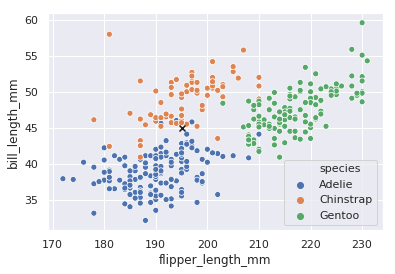

In [4]:
new_point = np.array([[195, 45]])

sns.scatterplot(data=penguin_data, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.scatter(new_point[:,0], new_point[:,1], marker='x', color='k')
xmin, xmax, ymin, ymax = plt.axis()

In [5]:
def knn(train_data, test_data, k):
	'''
		Inputs:
		- train_data is a numpy array of size (num_examples, 3)
		- test_data is a numpy array of size (num_test, 2)
	'''

	species_arr = np.zeros((len(test_data), 1), dtype=int)

    # TODO
    
	return species_arr

In [6]:
detected_arr = knn(penguin_data, new_point, k)

for j in range(len(new_point)):
	print('The predicted species is ' + penguin_species[detected_arr[j,0]])

The predicted species is Adelie


### Question 2
The correct answer should be Chinstrap.

Implement the function `knn` and you will see the correct result.

## Creat the whole decision map

(30.723330573951436, 60.976669426048566)

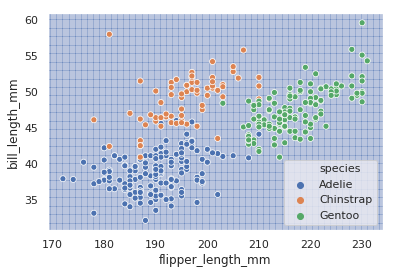

In [7]:
x_min, x_max = penguin_data.iloc[:,0].min(), penguin_data.iloc[:,0].max()
y_min, y_max = penguin_data.iloc[:,1].min(), penguin_data.iloc[:,1].max()
x_range = x_max - x_min
y_range = y_max - y_min
xx, yy = np.meshgrid(np.arange(x_min - 0.1*x_range, x_max + 0.1*x_range, x_range*0.02),
                     np.arange(y_min - 0.1*y_range, y_max + 0.1*y_range, x_range*0.02))

species_map = knn(penguin_data, np.c_[xx.ravel(), yy.ravel()], k);


# Put the result into a color plot
species_map = np.asarray(species_map).reshape(xx.shape)


plt.figure()
plt.pcolormesh(xx, yy, species_map, alpha=0.3, edgecolors='none',
	cmap=ListedColormap(sns.color_palette().as_hex()[0:3]), vmin=0, vmax=2)

sns.scatterplot(data=penguin_data, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

### Question 3
Once the function `knn` is correct, you will see the map.

# K means clustering

In [8]:
from sklearn.cluster import KMeans

no_label_penguin_data = penguin_data[['flipper_length_mm', 'bill_length_mm']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(no_label_penguin_data)
print(kmeans.labels_)

sns.scatterplot(data=no_label_penguin_data, x="flipper_length_mm", y="bill_length_mm", hue=kmeans.labels_)
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').